In [32]:
## Goal of this notebook is to generate N-dimensional lotka-volterra models 
using SparseArrays
using DifferentialEquations
using Plots

In [33]:
function lotka_volterra(D, u0, endtime=100, resolution=200)
    function odes(du, u, p, t)
        D = p
        X = rand(D, D)
        r = rand(D, 1)
        A = X
        b = X[:, 1] .- r[1]
        for i in 1:D-1
            A = blockdiag(sparse(A), sparse(X))
            b = vcat(b, X[:, i+1] .- r[i+1])
        end
        gammavec = A\b #Solve the linear system of equations
        gamma_matrix = reshape(gammavec, D, D)' #Reshape as a DxD matrix and transpose

        du = r - u + gamma_matrix*u
    end

    tspan = [0, endtime] #Span of time to integrate for
    savetimes = LinRange(0, endtime, resolution) #linear space of points until final time
    prob = ODEProblem(odes, u0, tspan, D)
    sol = solve(prob, Tsit5(), reltol=1e-3, abstol=1e-6, saveat=savetimes)
    return sol
end

lotka_volterra (generic function with 3 methods)

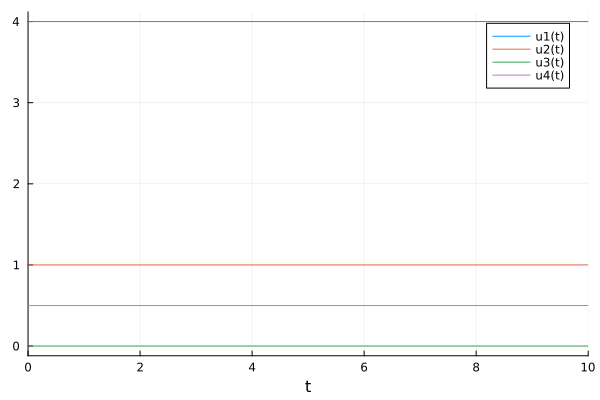

In [43]:
sol = lotka_volterra(4, [4., 1., 0., 0.5], 10, 250)
plot(sol)